In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
polygon = np.array([[0, 0], [6, 0], [3, 6], [0, 0]])

In [ ]:
def plot_polygon(polygon, title):
    plt.figure(figsize=(6, 6))
    plt.plot(polygon[:, 0], polygon[:, 1], 'o-', label='Polygon')
    plt.title(title)
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
    plt.legend()
    plt.show()

In [ ]:
def translate(polygon, tx, ty):
    translation_matrix = np.array([[1, 0, tx],
                                    [0, 1, ty],
                                    [0, 0, 1]])
    homogeneous_polygon = np.hstack((polygon, np.ones((polygon.shape[0], 1))))
    translated_polygon = (translation_matrix @ homogeneous_polygon.T).T
    return translated_polygon[:, :2]

In [ ]:
def scale(polygon, sx, sy):
    scaling_matrix = np.array([[sx, 0, 0],
                                [0, sy, 0],
                                [0, 0, 1]])
    homogeneous_polygon = np.hstack((polygon, np.ones((polygon.shape[0], 1))))
    scaled_polygon = (scaling_matrix @ homogeneous_polygon.T).T
    return scaled_polygon[:, :2]

In [ ]:
def rotate(polygon, angle):
    rad = np.radians(angle)
    rotation_matrix = np.array([[np.cos(rad), -np.sin(rad), 0],
                                 [np.sin(rad), np.cos(rad), 0],
                                 [0, 0, 1]])
    homogeneous_polygon = np.hstack((polygon, np.ones((polygon.shape[0], 1))))
    rotated_polygon = (rotation_matrix @ homogeneous_polygon.T).T
    return rotated_polygon[:, :2]

In [ ]:
def reflect(polygon, axis):
    if axis == 'x':
        reflection_matrix = np.array([[1, 0, 0],
                                       [0, -1, 0],
                                       [0, 0, 1]])
    elif axis == 'y':
        reflection_matrix = np.array([[-1, 0, 0],
                                       [0, 1, 0],
                                       [0, 0, 1]])
    homogeneous_polygon = np.hstack((polygon, np.ones((polygon.shape[0], 1))))
    reflected_polygon = (reflection_matrix @ homogeneous_polygon.T).T
    return reflected_polygon[:, :2]

In [ ]:
def shear(polygon, shx, shy):
    shearing_matrix = np.array([[1, shx, 0],
                                 [shy, 1, 0],
                                 [0, 0, 1]])
    homogeneous_polygon = np.hstack((polygon, np.ones((polygon.shape[0], 1))))
    sheared_polygon = (shearing_matrix @ homogeneous_polygon.T).T
    return sheared_polygon[:, :2]

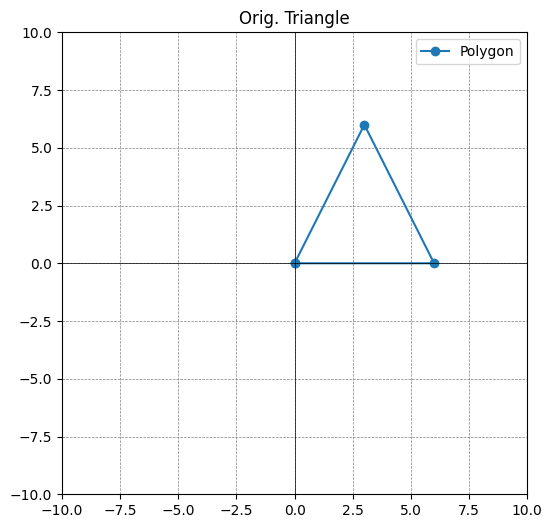

In [ ]:
plot_polygon(polygon, "Orig. Triangle")

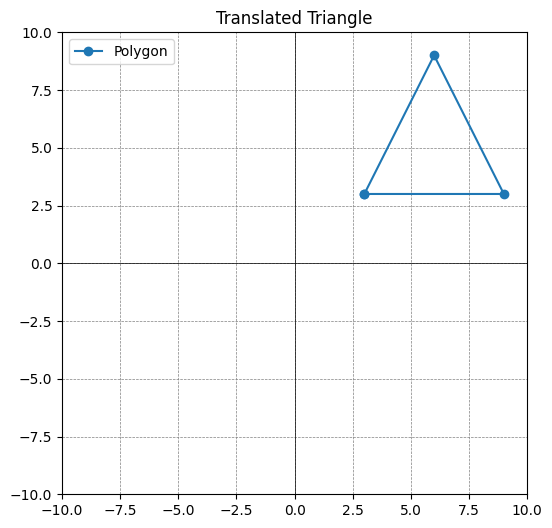

In [ ]:
translated_polygon = translate(polygon, 3, 3)
plot_polygon(translated_polygon, "Translated Triangle")

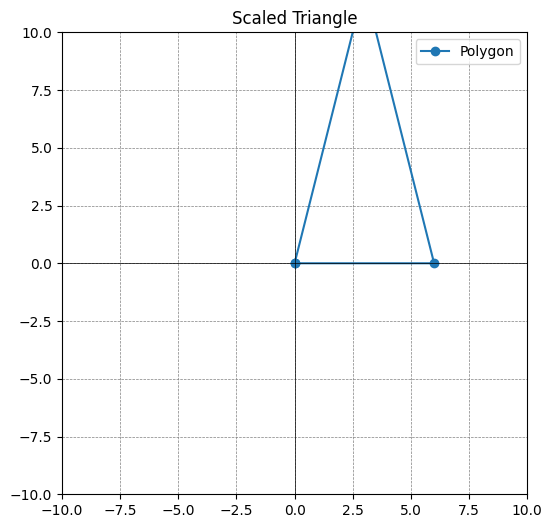

In [ ]:
scaled_polygon = scale(polygon, 1, 2)
plot_polygon(scaled_polygon, "Scaled Triangle")

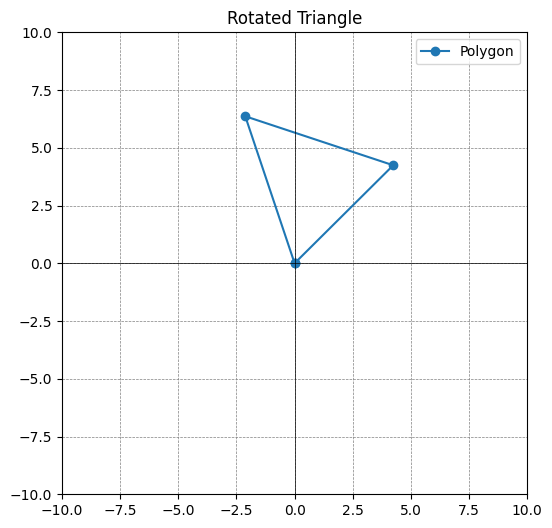

In [ ]:
rotated_polygon = rotate(polygon, 45)
plot_polygon(rotated_polygon, "Rotated Triangle")

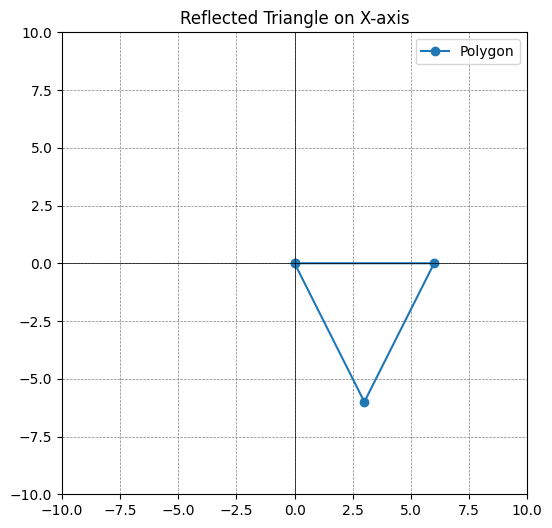

In [ ]:
reflected_polygon = reflect(polygon, 'x')
plot_polygon(reflected_polygon, "Reflected Triangle on X-axis")

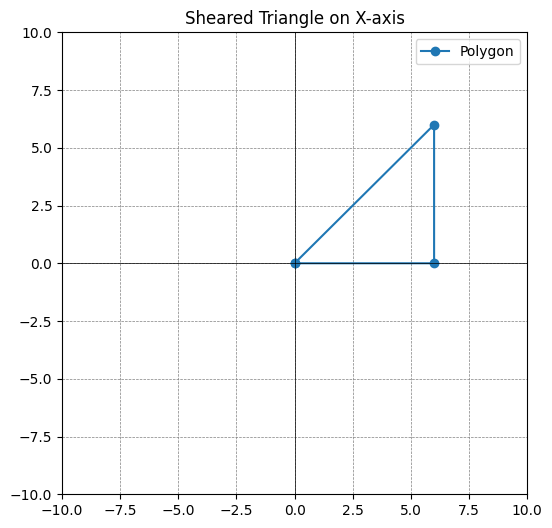

In [ ]:
sheared_polygon = shear(polygon, 0.5, 0)
plot_polygon(sheared_polygon, "Sheared Triangle on X-axis")

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
image = cv2.imread('/content/Picture1.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [ ]:
def display_image(img, title):
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')
    plt.show()

In [ ]:
def translate_image(image, tx, ty):
    rows, cols = image.shape[:2]
    translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
    return cv2.warpAffine(image, translation_matrix, (cols, rows))

In [ ]:
def rotate_image(image, angle):
    rows, cols = image.shape[:2]
    rotation_matrix = cv2.getRotationMatrix2D((cols/2, rows/2), angle, 1)
    return cv2.warpAffine(image, rotation_matrix, (cols, rows))

In [ ]:
def scale_image(image, fx, fy):
    return cv2.resize(image, None, fx=fx, fy=fy, interpolation=cv2.INTER_LINEAR)

In [ ]:
def reflect_image(image, axis):
    if axis == 'x':
        return cv2.flip(image, 0)
    elif axis == 'y':
        return cv2.flip(image, 1)

In [ ]:
def crop_image(image, x, y, w, h):
    return image[y:y+h, x:x+w]

In [ ]:
def shear_image(image, shear_x, shear_y):
    rows, cols = image.shape[:2]
    shear_matrix = np.float32([[1, shear_x, 0], [shear_y, 1, 0]])
    return cv2.warpAffine(image, shear_matrix, (cols, rows))

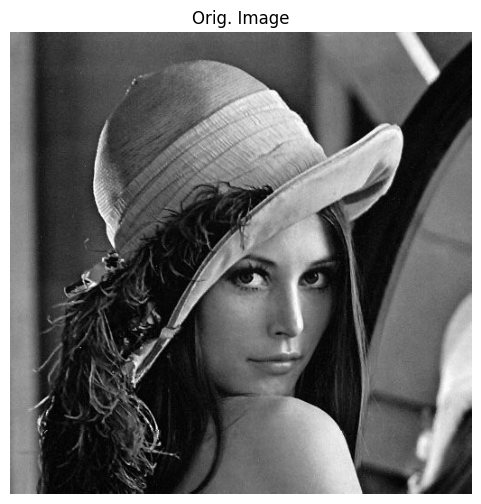

In [ ]:
display_image(image, "Orig. Image")

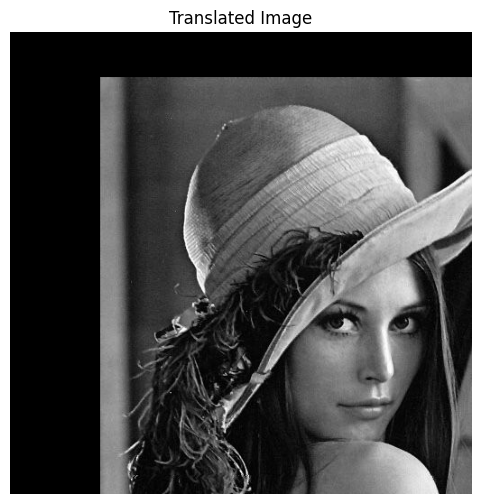

In [ ]:
translated_img = translate_image(image, 100, 50)
display_image(translated_img, "Translated Image")

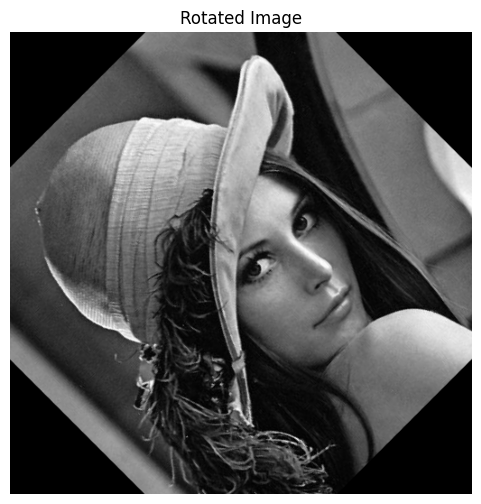

In [ ]:
rotated_img = rotate_image(image, 45)
display_image(rotated_img, "Rotated Image")

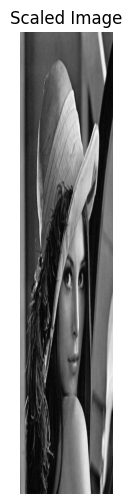

In [ ]:
scaled_img = scale_image(image, 0.5, 2.5)
display_image(scaled_img, "Scaled Image")

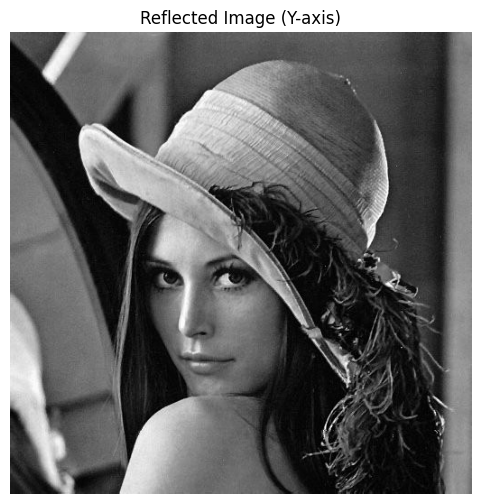

In [ ]:
reflected_img = reflect_image(image, 'y')
display_image(reflected_img, "Reflected Image (Y-axis)")

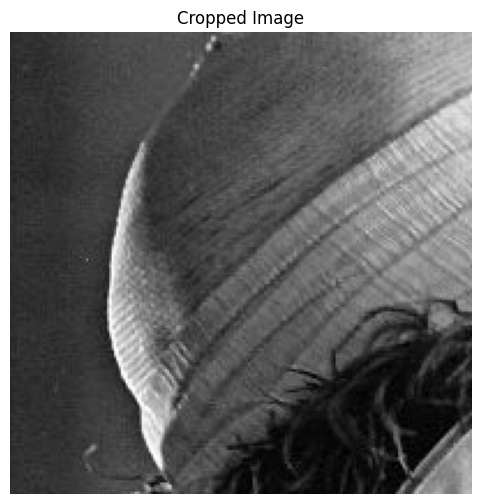

In [ ]:
cropped_img = crop_image(image, 50, 50, 200, 200)
display_image(cropped_img, "Cropped Image")

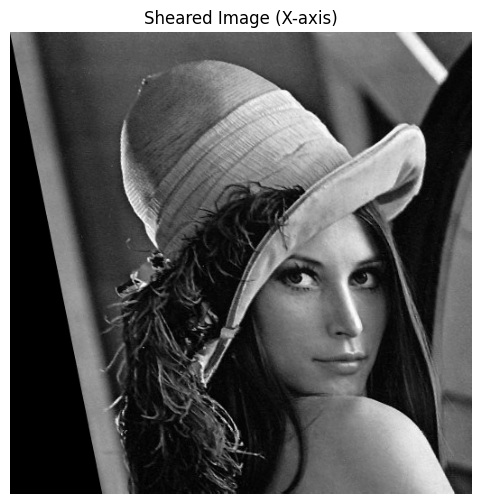

In [ ]:
sheared_img = shear_image(image, 0.2, 0)
display_image(sheared_img, "Sheared Image (X-axis)")